In [1]:
import numpy as np
np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)), X]

In [3]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄을 위한 하이퍼 파라미터
m = 100

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1) # 시작점을 무작위로 선택

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(epoch * m + i)
        theta = theta - alpha * gradients

In [4]:
X_b[50]

array([1.        , 1.93916926])

In [5]:
X_b[50:51]

array([[1.        , 1.93916926]])

In [6]:
theta

array([[4.19000137],
       [2.73381258]])

In [7]:
# mini-batch gradient descent
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.rand(2,1) # 랜덤 초기화
m = 100

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [8]:
theta

array([[4.25214626],
       [2.78964087]])

## 다항 회귀

In [9]:
m = 100
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [10]:
import matplotlib.pyplot as plt

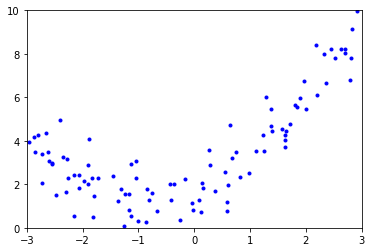

In [11]:
plt.plot(X, y, 'b. ')
plt.axis([-3, 3, 0, 10])
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [13]:
X_poly = poly_features.fit_transform(X)

In [14]:
X[0]

array([-0.75275929])

In [15]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lin_reg.intercept_

array([1.78134581])

In [18]:
lin_reg.coef_   # theta1은 1, theta2는 0.5 였음

array([[0.93366893, 0.56456263]])

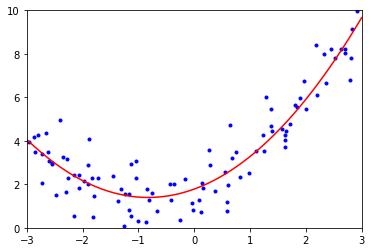

In [19]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b. ')
plt.plot(X_new, y_new, 'r-')
plt.axis([-3, 3, 0, 10])
plt.show()

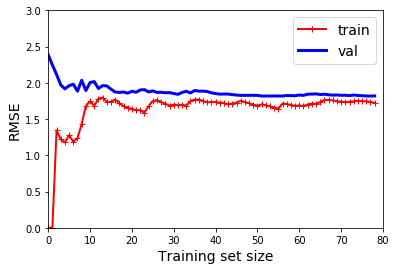

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
plt.show()


### train 초기에는 오차율이 아주 낮음 --> 한개로 학습하고 그 한개를 대상으로 오차를 측정하면 당연히 오차율이 작음

In [21]:
from sklearn.pipeline import Pipeline
# 10차 다항회귀 모델의 학습 곡선
polynomial_regression =  Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression())
])

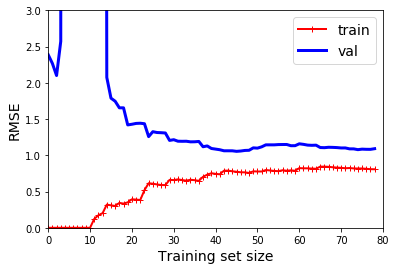

In [22]:
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

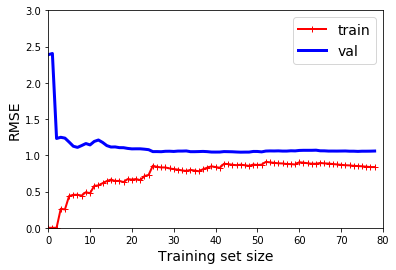

In [23]:
# 2차 다항회귀 모델의 학습 곡선
polynomial_regression2 =  Pipeline([
    ('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression2, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

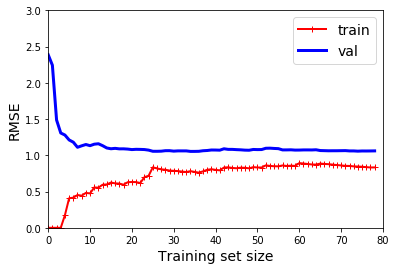

In [24]:
# 3차 다항회귀 모델의 학습 곡선
polynomial_regression3 =  Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression3, X, y)
plt.axis([0, 80, 0, 3])
plt.show()